In [1]:
import pandas as pd
import numpy as np
import scipy.signal as sci 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from scipy.signal import butter, filtfilt 
import os
from Lab2Functions import decg_peaks, d_ecg_peaks, Rwave_peaks

In [2]:
#Daten Einlesen:
dataBTOM = pd.read_csv('data/BelastungEKGTOM.csv', sep='\t')
dataRTOM = pd.read_csv('data/RuheEKGTOM.csv', sep='\t')
dataRGEORG = pd.read_csv('data/RuheEKGGEORG.csv', sep='\t')
#anzahl_zu_kürzen = 2000
#dataRGEORGshort = dataRGEORG[:-anzahl_zu_kürzen]
dataRAMELIE = pd.read_csv('data/RuheEKGAMELIE.csv', sep='\t')

#Spalten benennen:
dataBTOM.columns = ['EKG', 'Time']
dataRTOM.columns = ['EKG', 'Time']
dataRGEORG.columns = ['EKG', 'Time']
dataRAMELIE.columns = ['EKG', 'Time']

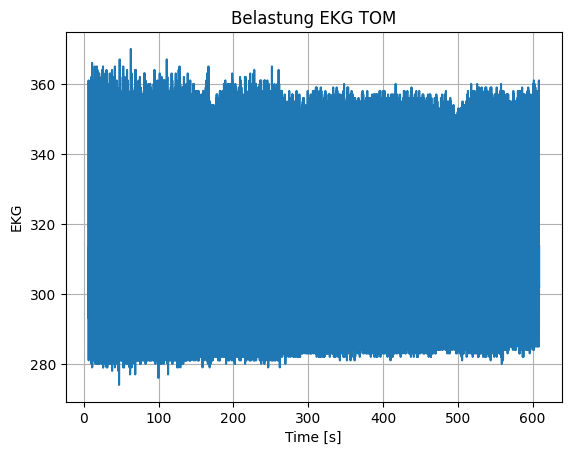

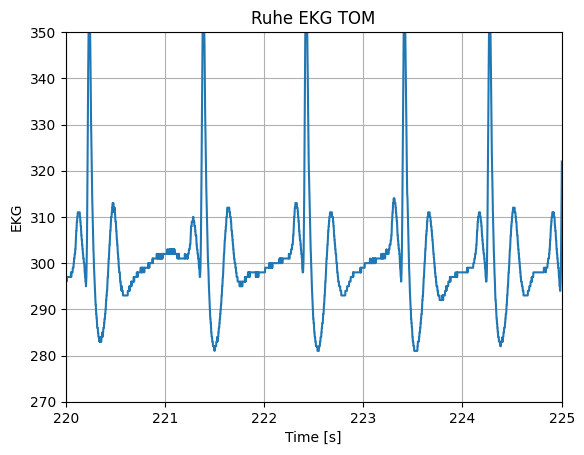

In [3]:
#Plotte dataBTOM mit gestrechter x-Achse:
plt.figure(1)
plt.plot(dataRTOM['Time']/1000, dataRTOM['EKG'])
plt.xlabel('Time [s]')
plt.ylabel('EKG')
plt.title('Belastung EKG TOM')
plt.grid()
plt.figure(2)
plt.plot(dataRTOM['Time']/1000, dataRTOM['EKG'])
plt.xlim(220, 225)
plt.ylim(270, 350)
plt.xlabel('Time [s]')
plt.ylabel('EKG')
plt.title('Ruhe EKG TOM')
plt.grid()
plt.show()


<span style="color: green; font-size: 24px; font-weight: bold;">AUFGABEN AB HIER</span>

1:  *Erstellen Sie ein Diagramm, in dem das kabellose Messsystem dargestellt wird. Beschriften Sie dabei jede Komponente und beschreiben Sie diese kurz (Stichpunkte).*

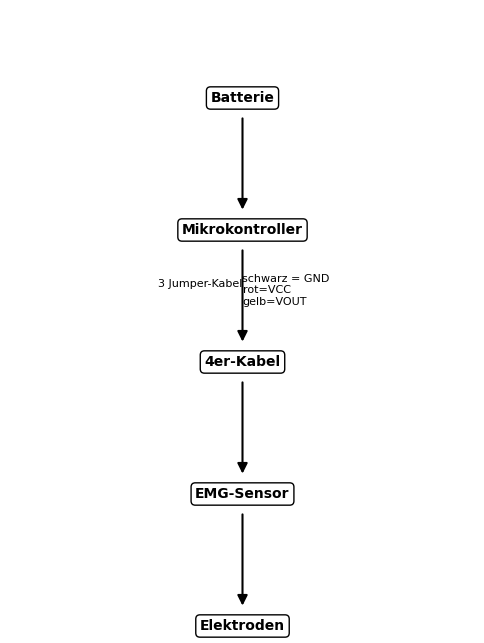

In [4]:
def add_box(ax, text, x, y):
    ax.text(x, y, text, ha="center", va="center",
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
            fontsize=10, weight='bold')

def add_arrow(ax, x_start, y_start, x_end, y_end, text_left="", text_right=""):
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                            mutation_scale=15, linewidth=1.5, color="black", arrowstyle='-|>')
    ax.add_patch(arrow)
    if text_left:
        ax.text((x_start + x_end) / 2, (y_start + y_end) / 2 + 0.1, text_left, ha="right", fontsize=8)
    if text_right:
        ax.text((x_start + x_end) / 2, (y_start + y_end) / 2 - 0.1, text_right, ha="left", fontsize=8)

# Erstellen der Grafik
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-6, 1)
ax.axis('off')  # Achsen ausblenden

# Boxen hinzufügen
add_box(ax, "Batterie", 0, 0)
add_box(ax, "Mikrokontroller", 0, -1.5)
add_box(ax, "4er-Kabel", 0, -3)
add_box(ax, "EMG-Sensor", 0, -4.5)
add_box(ax, "Elektroden", 0, -6)

# Pfeile hinzufügen
add_arrow(ax, 0, -0.2, 0, -1.3)
add_arrow(ax, 0, -1.7, 0, -2.8, text_left="3 Jumper-Kabel", text_right="schwarz = GND\nrot=VCC\ngelb=VOUT")
add_arrow(ax, 0, -3.2, 0, -4.3)
add_arrow(ax, 0, -4.7, 0, -5.8)

# Anzeigen
plt.show()

2:  *Beschreiben Sie was im seriellen Plotter zu erkennen ist, wenn Sie Ihre Messdaten aufnehmen und der Laptop dabei nicht am Stromnetz angeschlossen ist. Was passiert, wenn Sie mit beiden Händen an das Metallgeäause des Laptops greifen und der Laptop am Stromnetz angeschlossen ist?*

Wenn der Laptop **nicht am Stromnetz** angeschlossen ist, zeigt der serielle Plotter meist stabilere und ruhigere Messdaten, da weniger elektrische Störungen auftreten.

Sobald der Laptop **am Stromnetz** angeschlossen ist und man das Metallgehäuse berührt, kann das Signal im Plotter unruhiger werden. Ein typisches 50-Hz-Rauschen kann aufgrund de Netzspannung sichtbar werden. Außerdem können weitere Störsignale auftreten da der Körper, welcher das Metallgehäuse berührt wie eine Antenne für Elektromagnetische Signale aus der Umgebung funktioniert und diese dann über den Kontakt in die Messung einfließen können. 

3: *Führen Sie Aufgabe 1 Teil 4: Experiment in Ruhe für jeden Teilnehmer Ihrer Gruppe aus und plotten Sie etwas 5 Sekunden der gefilterten Daten. Markieren Sie für einen Teilnehmer die P-Welle, den QRS-Komplex und die T-Welle im Plot. Beschreiben Sie das physiologische Phänomen, welches für die jeweiligen elektrischen Signale des EKGs verantwortlich ist.*

In [5]:
#Glättten der Signale:
Wn = 0.1-0.08 #wie im PDF beschrieben ist Wn zwischen 0.08 und 0.1 um Rauschen von etwa 50Hz zu unterdrücken
b, a = sci.butter(4, Wn, 'low', analog=False)

#Ruhe EKG TOM:
fdataRTOM = filtfilt(b, a, dataRTOM['EKG'])

#Ruhe EKG GEORG:
fdataRGEORG = filtfilt(b, a, dataRGEORG['EKG'])

#Ruhe EKG AMELIE:
fdataRAMELIE = filtfilt(b, a, dataRAMELIE['EKG'])

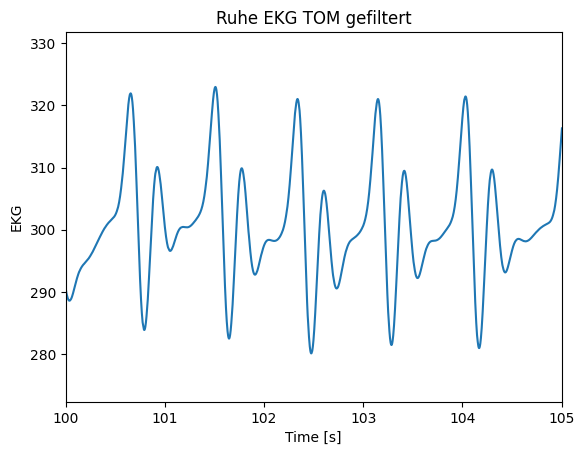

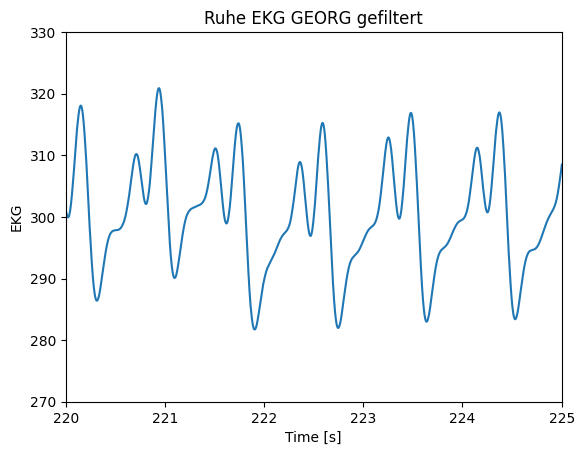

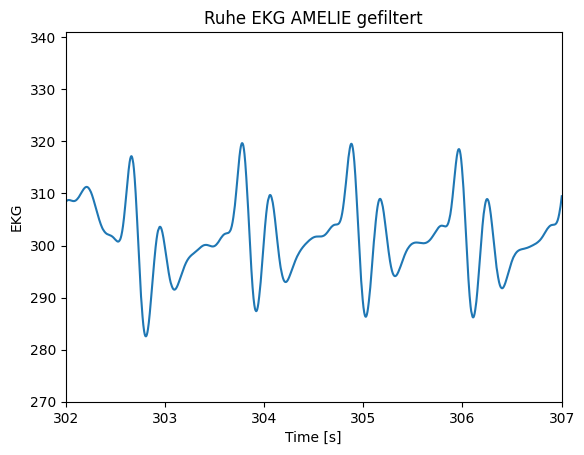

In [6]:
#gefiltere Signale plotten:

#Tom
plt.figure(1)
plt.plot(dataRTOM['Time']/1000, fdataRTOM)
plt.xlim(100, 105)
plt.xlabel('Time [s]')
plt.ylabel('EKG')
plt.title('Ruhe EKG TOM gefiltert')

#Georg
plt.figure(2)
plt.plot(dataRGEORG['Time']/1000, fdataRGEORG)
plt.xlim(220, 225)
plt.ylim(270, 330)
plt.xlabel('Time [s]')
plt.ylabel('EKG')
plt.title('Ruhe EKG GEORG gefiltert')

#Amelie
plt.figure(3)
plt.plot(dataRAMELIE['Time']/1000, fdataRAMELIE)
plt.xlim(302, 307)
plt.ylim(270, 341)
plt.xlabel('Time [s]')
plt.ylabel('EKG')
plt.title('Ruhe EKG AMELIE gefiltert')

plt.show()


Die P-Welle repräsentiert die Erregungsausbreitung in den Vorhöfen woraufhin Blut von dort in die Ventrikel fließen kann - der Elektrische Impuls der Sinusknoten wird gemessen. 

Nach der Depolarisation während des QRS-Komplexes werden die Ventrikel repolarisiert (representativ dafür steht die T-Welle) um den nächsten Herzschlag ausführen zu können und die Ventrikel über die Purkinje-Fasers zu kontrahieren.

5: *Geben Sie den Code an, welcher für die Aufnahme der Rohdaten des EKG Signals verantwortlich ist.*

6:  *Plotten Sie etwa 5 Sekunden des EKG-Signals vom Experiment in Ruhe von einem der Teilnehmer (gefiltert). Nutzen Sie die Ergebnisse der Peak Suche-Funktion, um die R-Zacken im Plot zu labeln.*

      EKG   Time
2550  301  11081
2551  301  11083
2552  300  11085
2553  300  11087
2554  299  11089
...   ...    ...
5045  299  16150
5046  299  16152
5047  299  16154
5048  300  16156
5049  300  16158

[2500 rows x 2 columns]


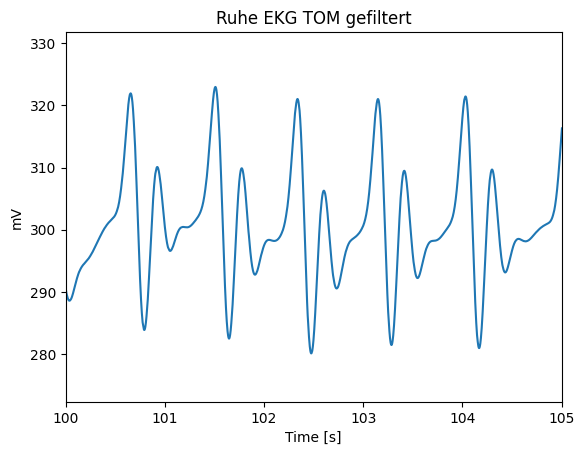

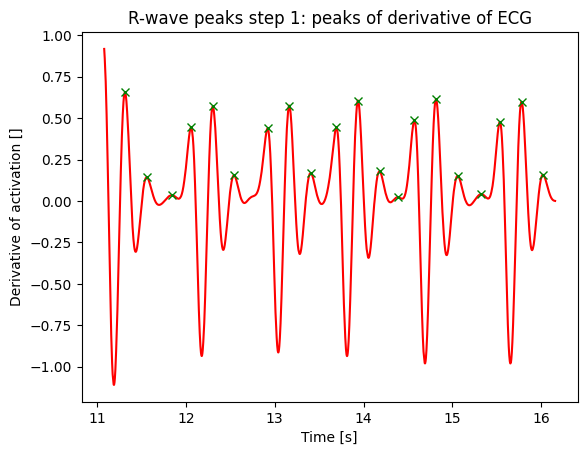

In [7]:
#Schritt 1:
plt.figure(1)
plt.plot(dataRTOM['Time']/1000, fdataRTOM)
plt.xlim(100, 105)
plt.xlabel('Time [s]')
plt.ylabel('mV')
plt.title('Ruhe EKG TOM gefiltert')

start_index = 2550
end_index = 5049

df_5sek_TOM = dataRTOM.iloc[start_index:end_index+1]
print(df_5sek_TOM)

f5sekdataRTOM = filtfilt(b, a, df_5sek_TOM['EKG'])
d_ecg, peaks_d_ecg = decg_peaks(f5sekdataRTOM, (df_5sek_TOM['Time'].reset_index(drop=True))/1000)



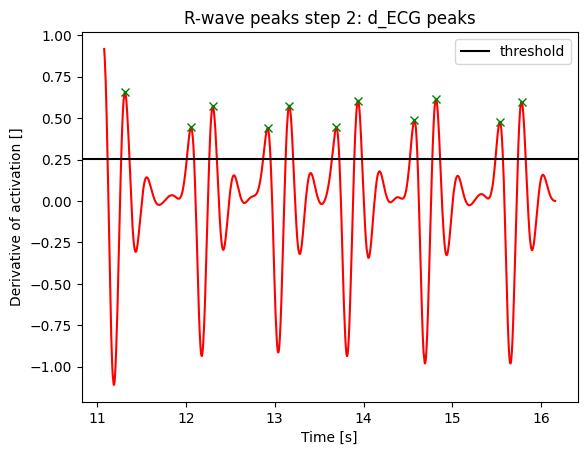

In [8]:
#Schritt 2:
Rwave_peaks_d_ecg = d_ecg_peaks(d_ecg, peaks_d_ecg, df_5sek_TOM['Time'].reset_index(drop=True)/1000, 0.4, 0.5)

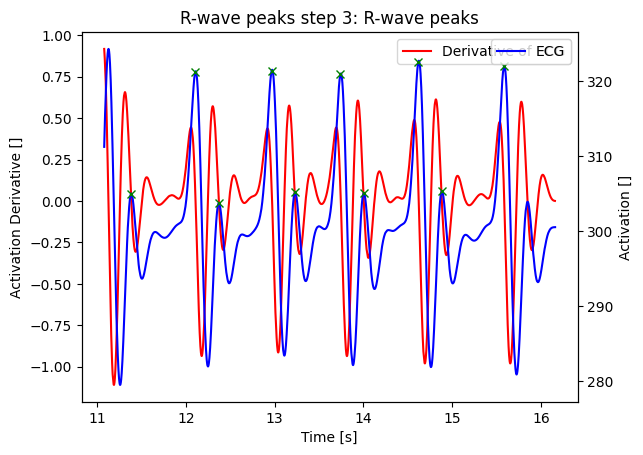

In [9]:
#Schritt 3:
Rwave_t = Rwave_peaks(f5sekdataRTOM, d_ecg, Rwave_peaks_d_ecg, df_5sek_TOM['Time'].reset_index(drop=True)/1000)

8:  *Lassen Sie einen Ihrer Gruppenteilnehmer das Experiment in Bewegung machen, welches in Aufgabe 1 Teil 5 beschrieben ist. Stellen Sie die gefilterte Herzfrequenz über die gesamte Zeit dar.*

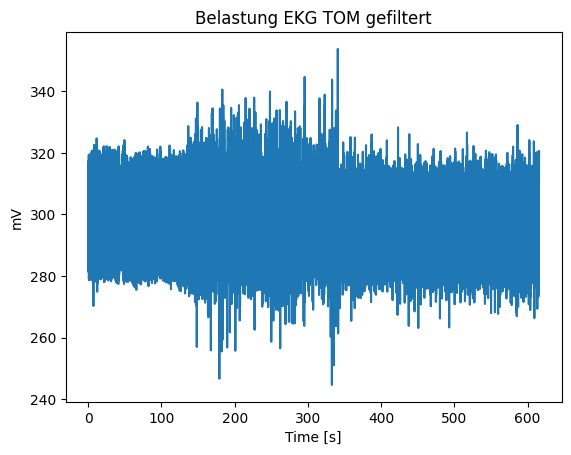

In [10]:
fdataBTOM = filtfilt(b, a, dataBTOM['EKG'])

#plot fdataBTOM über gesamte Zeit
plt.figure(1)
plt.plot(dataBTOM['Time']/1000, fdataBTOM)
plt.xlabel('Time [s]')
plt.ylabel('mV')
plt.title('Belastung EKG TOM gefiltert')
plt.show()

9: &emsp;*Fokussieren Sie sich nun auf 5.a).i) des Experiments, also dem Ruhen auf dem Ergometer (2 min)*<br>
*(a) Plotten Sie die gefilterte Herzfrequenz gegen die Zeit während den ersten 3 Minuten. Markieren Sie im Plot, wann das Treten und somit die Steigerung der Leistung beginnt.*


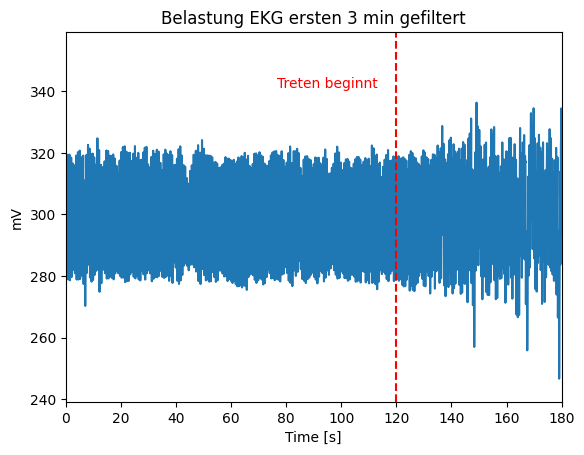

In [11]:
plt.figure(1)
plt.plot(dataBTOM['Time']/1000, fdataBTOM)
plt.xlabel('Time [s]')
plt.ylabel('mV')
plt.title('Belastung EKG ersten 3 min gefiltert')
plt.xlim(0, 180)
plt.axvline(x=120, color='r', linestyle='--', label='x = 120s')
plt.text(95, plt.ylim()[1]*0.95, 'Treten beginnt', color='r', ha='center')
plt.show()

(b)&emsp;*Beschreiben Sie die Dynamik des Anstiegs der Herzfrequenz. Warum sind Start der Übung und Anstieg der Herzfrequenz nicht zum selben Zeitpunkt?*

Das Herzkreislaufsystem reagiert auf die Steigende Belastung indem  es den Blutfluss und die Sauerstoffversorgung erhöht. Das braucht einen Moment, in den geplotteten Daten so etwa 15sek.

(c)&emsp;*Beschreiben Sie, was unter dem Begriff Cardiac Output verstanden wird (2-4 Sätze). Warum bewirkt eine plötzliche Aktivierung der Muskulatur keine direkte Änderung des Cardiac Outputs?*<br>
'**cardiac output**: The volume of blood pumped by the heart, in particular by the left or right ventricle, in the time interval of one minute.' [Definition aus Internet](https://med.libretexts.org/Bookshelves/Anatomy_and_Physiology/Anatomy_and_Physiology_(Boundless)/17%3A_Cardiovascular_System%3A_The_Heart/17.4%3A_Physiology_of_the_Heart/17.4E%3A_Cardiac_Output)<br>
Der Anstieg der Herzfrequenz und des Schlagvolumens erfolgt verzögert, da das Herzkreislaufsystem erst erst hormonell und vom Nervensystem angeregt werden muss.